# Part 1 - Exploratory Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
login_times = pd.read_json('logins.json')

In [3]:
#Looking at first few entries
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#Looking at column's data type
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#Aggregating login counts based on 15 minute time intervals 
login_times.set_index('login_time', inplace=True)
login_times['count'] = 1
login_times.sort_index(inplace=True)
login_times_agg = login_times.resample("15min").sum()

In [6]:
login_times_agg['count'].sum()

93142

In [7]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


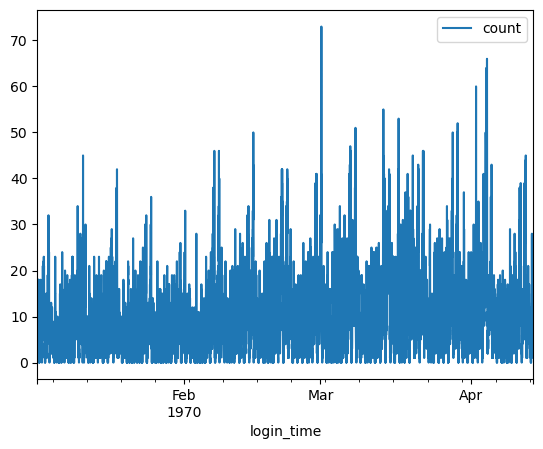

In [9]:
#Ready to start visualization
login_times_agg.plot()
plt.show()

Not much can be seen by this plot. 

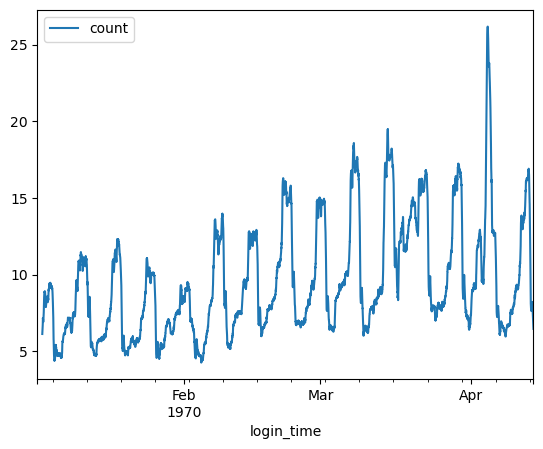

In [10]:
#Let's plot average number of logins in a 24 hr period
login_times_agg.rolling(window=96).mean().plot()
plt.show()

This is much better. We can see the demand rise and fall on a weekly basis. If we focus on one month, then we can confirm weekly trends. 

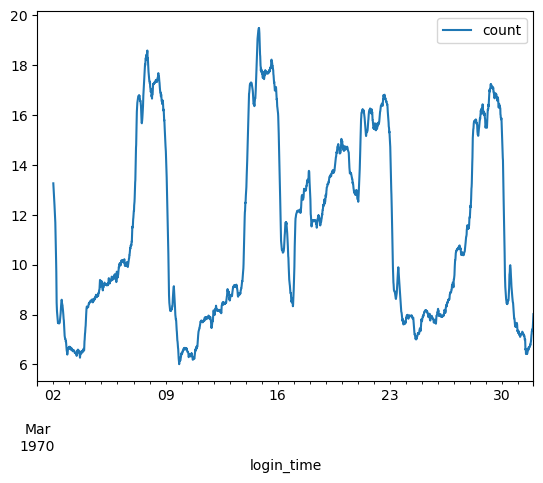

In [11]:
#Let's focus on just March logins
login_times_agg.loc['1970-03'].rolling(window=96).mean().plot()
plt.show()

The pattern is pretty consistent. It rises on the weekends, and drops on the weekdays. When it does drop in the weekend, it seems to be at night. If we have to make sure of this, then we have to look at a specific week. 

In [12]:
#This looks for day of week. 6 means Sunday, since Sunday is the sixth day of the week (0-based index)
datetime.datetime(1970, 3, 1).weekday()

6

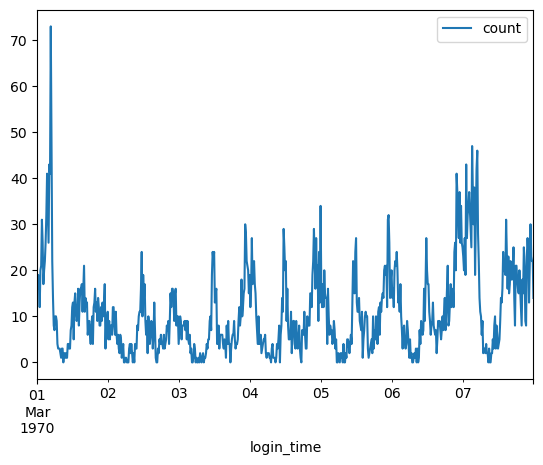

In [13]:
#Plotting first week of March
login_times_agg.loc['1970-03-01':'1970-03-07'].plot()
plt.show()

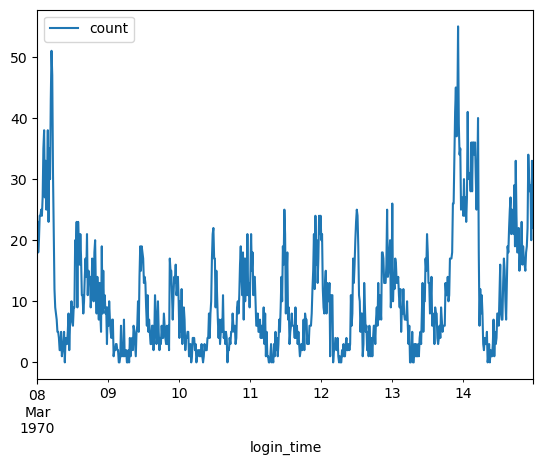

In [14]:
#plotting second week of March 
login_times_agg.loc['1970-03-08':'1970-03-14'].plot()
plt.show()

This confirms that the weekends are high in demand. There is also a consistent rise and fall that conincides with day and night. If we look at a few day period, we can see the hourly trends. 

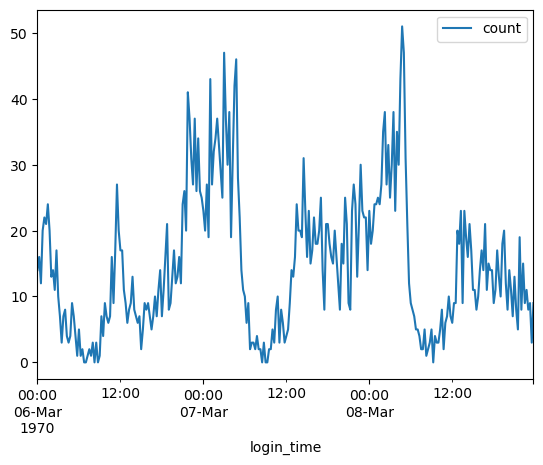

In [15]:
#Let's try a weekend
login_times_agg.loc['1970-03-06':'1970-03-08'].plot()
plt.show()

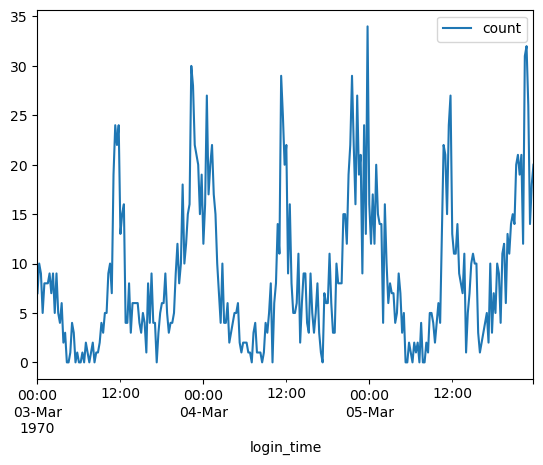

In [16]:
#Now let's try a few weekdays
login_times_agg.loc['1970-03-03':'1970-03-05'].plot()
plt.show()

For weekends, demand is actually the highest around midnight. 
For weekdays, the demand is highest around noon and midnight. 

Let's try another weekend and group of weekdays to make sure the pattern is consistent 

In [17]:
datetime.datetime(1970, 4, 1).weekday()

2

April 1st is a Wednesday. So we'll plot March 31st-April 2nd, and April 3th-5th.

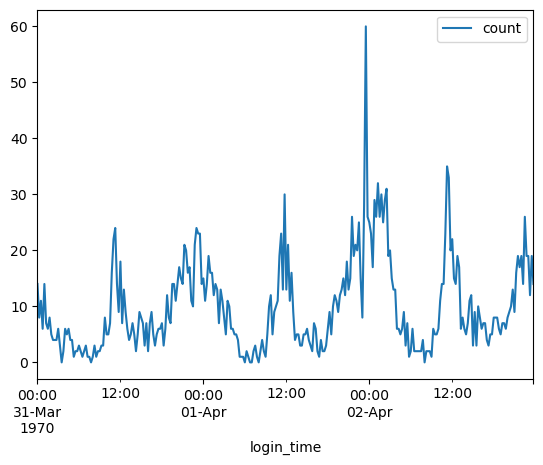

In [18]:
login_times_agg.loc['1970-03-31':'1970-04-02'].plot()
plt.show()

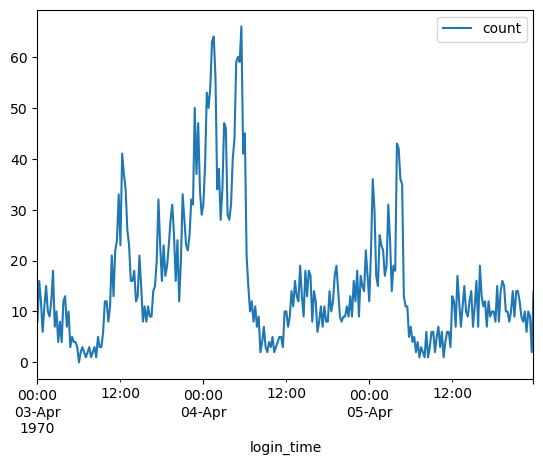

In [19]:
login_times_agg.loc['1970-04-03':'1970-04-05'].plot()
plt.show()

Since it's the same results as the previous plots, then we can be confident in our conclusions. 

The conclusions are:

    1)Demand is higher on weekends than weekdays. 
    2)Demand is highest around midnight on weekends. 
    3)Demand is highest around midnight and noon on weekdays. 

# Part 2 - Experiment and Metrics Design

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

The metric I would choose would be weekend engagement for drivers in the opposite of their primary city. With the difference in activity on weekdays, I think  it would be rare for drivers to use both cities. However, since weekends have reasonable activity for both cities, it makes more sense for drivers to drive to both cities. 

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats

First, I would track drivers activity before the program on both weekdays and weekends. I would see if they are spending their time more on one city over the other, or if they are split more evenly. Then, there would be an announcement of the changed toll policy. Their trips will be tracked again. The most noteworthy statistic would be the change in city. A t-test to compare the average number of trips back and forth as well as trips in the weekend city. If there is enough trips, then a cost analysis would be done. If the cost analysis yields positive results, then there would be a push to make it permanent. 

# Part 3 - Predictive Modeling 

# 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [20]:
import json
import seaborn as sns
import sklearn

In [21]:
data = pd.read_json('ultimate_data_challenge.json')
df = pd.DataFrame(data)

In [22]:
#Looking at some of the characteristics of the data
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [23]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [24]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
#Let's make sure to change the last_trip_date and signup_date columns to datetime columns
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [26]:
#let's see the last last_trip_date
last_date = df.last_trip_date.max()
last_date

Timestamp('2014-07-01 00:00:00')

So it's the first of July. Let's see the preceding 30 days, which would be the month of June. 

In [27]:
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= '2014-06-01').count()
fraction_retained

0.37608

So 37.6% of users were retained.

In [28]:
#We'll add a new column to show the finding 
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  was_retained            50000 non-null  int32 

There are only two columns that have object datatype. These are city, and phone. Let's see if there are few enough values to do one-hot encoding. 

In [30]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [31]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

There are few enough values that they can be one-hot encoded. First, we must fill all null values.

In [32]:
df.city.fillna('Unknown', inplace=True)
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [33]:
df.phone.fillna('Unknown', inplace=True)
df.phone.value_counts()

iPhone     34582
Android    15022
Unknown      396
Name: phone, dtype: int64

It seems that only phone had null values. 

In [34]:
cities_ohe = pd.get_dummies(df['city'])
phones_ohe = pd.get_dummies(df['phone'])
df = df.join(cities_ohe)
df = df.join(phones_ohe)
df.drop(['city', 'phone'], axis=1, inplace=True)

In [35]:
#Let's see if they have been one-hot encoded. 
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained,Astapor,King's Landing,Winterfell,Android,Unknown,iPhone
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that about 33% of users are from Astapor, 20% of users are from King's Landing, and 47% of users are from Winterfell. Also, we see that roughly 70% of users use an iPhone and 30% use an Android. A negligible amount of users use neither. 

In [36]:
corr = df.corr()
corr['was_retained'].sort_values(ascending=False)

C:\Users\16096\AppData\Local\Temp\ipykernel_25880\1632263507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


was_retained              1.000000
King's Landing            0.262284
iPhone                    0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
Unknown                  -0.007419
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
Winterfell               -0.046611
avg_dist                 -0.092780
Astapor                  -0.174655
Android                  -0.225464
Name: was_retained, dtype: float64

It seems that whether a user is retained or not is correlated with two factors. 
These are:

1)Number of trips in the user's first 30 days

2)If they are an Ultimate Black user or not

Users who are from King's Landing and using an iPhone are also correlated with retention. Users from Astapor or Winterfell or using an Android are negatively correlated. 

Let's visualize it with a heatmap. 

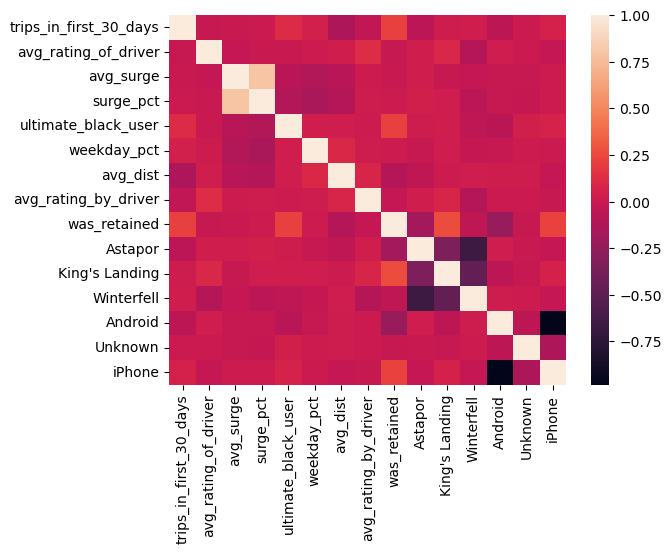

In [37]:
ax = sns.heatmap(corr)
plt.show()

# 2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.

In [38]:
# It would be helpful to create seperate dataframes for active and inactive users
df_active = df[df['was_retained'] == True]
df_non_active = df[df['was_retained'] == False]

In [39]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained,Astapor,King's Landing,Winterfell,Android,Unknown,iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0,0


It looks good. Now, we should create a dataframe with the necessary features. 

In [40]:
#Let's start with 'was_retained' as the first column
df_for_model = pd.DataFrame({'was_retained': df['was_retained'].values})
df_for_model

,was_retained
0,1
1,0
2,0
3,1
4,0
...,...
49995,1
49996,0
49997,0
49998,0


    Now we will add all continous variables. It is important to scale them first. 

In [41]:
# Import and instantiate MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize the relevant features
x = df.iloc[:, [0, 2, 3, 5, 7, 8, 9]].values
x_scaled = min_max_scaler.fit_transform(x)

# Save the normalized values into a dataframe
df_scaled = pd.DataFrame(x_scaled, columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])

# add normalized dataframe to df_ml dataframe
df_for_model = pd.concat([df_for_model, df_scaled], axis=1)
df_for_model.head(3)

,was_retained,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,1,0.032,0.925,0.014286,0.154,0.462,0.022801,1.0
1,0,0.000,1.000,0.000000,0.000,0.500,0.051317,1.0
2,0,0.024,0.825,0.000000,0.000,1.000,0.004784,1.0


Now the categorical variables.

In [42]:
df_for_model = df_for_model.join(df[['Astapor', "King's Landing", 'Winterfell', 'Android', 'Unknown', 'iPhone']])

In [43]:
df_for_model

,was_retained,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Unknown,iPhone
0,1,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000,0,1,0,0,0,1
1,0,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000,1,0,0,1,0,0
2,0,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000,1,0,0,0,0,1
3,1,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975,0,1,0,0,0,1
4,0,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0.000,1.000,0.000000,0.000,1.000,0.034978,0.800,0,1,0,0,0,1
49996,0,0.008,NaN,0.000000,0.000,0.000,0.000000,0.750,1,0,0,0,0,1
49997,0,0.000,1.000,0.000000,0.000,1.000,0.023981,1.000,0,0,1,1,0,0
49998,0,0.016,0.500,0.000000,0.000,1.000,0.028454,0.625,1,0,0,0,0,1


Finally, the 'ultimate_black_user' feature

In [44]:
df_for_model['ultimate_black_user'] = df['ultimate_black_user']
df_for_model.head(3)

,was_retained,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Unknown,iPhone,ultimate_black_user
0,1,0.032,0.925,0.014286,0.154,0.462,0.022801,1.0,0,1,0,0,0,1,True
1,0,0.000,1.000,0.000000,0.000,0.500,0.051317,1.0,1,0,0,1,0,0,False
2,0,0.024,0.825,0.000000,0.000,1.000,0.004784,1.0,1,0,0,0,0,1,False


In [45]:
#Making sure there is no NAN values since the model would not allow it
nan = df.isna().sum()
nan

trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
was_retained                 0
Astapor                      0
King's Landing               0
Winterfell                   0
Android                      0
Unknown                      0
iPhone                       0
dtype: int64

We'll have to fill all NAN values from the 'avg_rating_of_driver' and 'avg_rating_by_driver' columns.  

In [46]:
df_for_model['avg_rating_of_driver'].value_counts(dropna=False)

1.000    20771
NaN       8122
0.750     4193
0.875     2498
0.950     2430
0.925     1945
0.975     1771
0.825     1487
0.900     1143
0.500     1003
0.850      829
0.800      601
0.625      488
0.700      428
0.775      398
0.675      364
0.000      256
0.725      255
0.250      209
0.575      201
0.650      172
0.600      108
0.375       94
0.550       53
0.425       47
0.525       39
0.450       28
0.325       22
0.475       13
0.400       12
0.275        6
0.125        4
0.350        3
0.175        2
0.200        2
0.225        1
0.150        1
0.300        1
Name: avg_rating_of_driver, dtype: int64

In [47]:
df_for_model['avg_rating_by_driver'].value_counts(dropna=False)

1.000    28508
0.950     4537
0.925     3330
0.975     3094
0.875     2424
0.900     2078
0.750     1914
0.825     1018
0.850      860
0.500      602
0.800      342
NaN        201
0.625      199
0.675      195
0.000      181
0.250      126
0.775      125
0.700      111
0.575       47
0.725       41
0.375       31
0.650       19
0.600        5
0.125        4
0.450        3
0.550        2
0.425        2
0.325        1
Name: avg_rating_by_driver, dtype: int64

We can fill out all NAN values with the majority value, or 1.0 under the scaler. 

In [48]:
df_for_model['avg_rating_of_driver'] = df_for_model['avg_rating_of_driver'].fillna(1.0)

In [49]:
df_for_model['avg_rating_by_driver'] = df_for_model['avg_rating_by_driver'].fillna(1.0)

Now for the model, I will use Random Forest Classifier. This should be a good model for this type of problem. 

In [50]:
# Let's divide the data into label and features for use in the model
X = df_for_model.iloc[:, 1:]
y = df_for_model.loc[:, 'was_retained']

# Let's split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=6)
classifier.fit(X_train, y_train)
y_pred_rfc = classifier.predict(X_test)
print('Accuracy on training set = {}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(classifier.score(X_test, y_test)))

Accuracy on training set = 0.99488
Accuracy on test set = 0.74432


In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[6233 1566]
 [1630 3071]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      7799
           1       0.66      0.65      0.66      4701

    accuracy                           0.74     12500
   macro avg       0.73      0.73      0.73     12500
weighted avg       0.74      0.74      0.74     12500



In [54]:
# Let's create a new dataframe to see what features were important for the model
df_features = pd.DataFrame({'importance': classifier.feature_importances_}, index=df_for_model.columns[1:])
df_features.sort_values('importance', ascending=False)

,importance
avg_dist,0.306621
weekday_pct,0.131744
avg_rating_by_driver,0.109645
surge_pct,0.083505
trips_in_first_30_days,0.079464
avg_rating_of_driver,0.077238
avg_surge,0.065590
King's Landing,0.050324
ultimate_black_user,0.032913
iPhone,0.019446


# 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Overall, the factors that heavily influence rider retention are avg_dist, weekday_pct, avg_rating_by_driver, and surge_pct. So, my recommendations to Ultimate would be to incentivize the behaviors related to these factors. 

More specifically, this would include discounts to the following: 

1)trips under a certain distance  

2)trips taking place in weekdays

3)new users